# 6.4: Supervised Machine Learning: Regression

### 1. Import data and libraries

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [66]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [8]:
# Define path

path = r'/Users/elenasharavara/Documents/02 Data /Prepared data'

In [179]:
# Import data

movie_dataset = pd.read_csv(os.path.join(path, 'movie_dataset.csv'), index_col = False)

### 2. Data wrangling and cleaning

In [171]:
movie_dataset.columns

Index(['Unnamed: 0', 'film_id', 'film_title', 'vote_average', 'vote_count',
       'status', 'release_date', 'revenue', 'runtime', 'adult', 'budget',
       'original_language', 'popularity', 'genres', 'production_companies',
       'production_countries', 'spoken_languages'],
      dtype='object')

In [172]:
movie_dataset.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
934740    False
934741    False
934742    False
934743    False
934744    False
Length: 934745, dtype: bool

In [122]:
# Check for missing values

movie_dataset.isnull().sum()

Unnamed: 0                   0
film_id                      0
film_title                  11
vote_average                 0
vote_count                   0
status                       0
release_date             84528
revenue                      0
runtime                      0
adult                        0
budget                       0
original_language            0
popularity                   0
genres                  328991
production_companies    477871
production_countries    362314
spoken_languages        356693
dtype: int64

In [19]:
#create a sample from larger data set 
sample = movie_dataset.sample(n=5000)


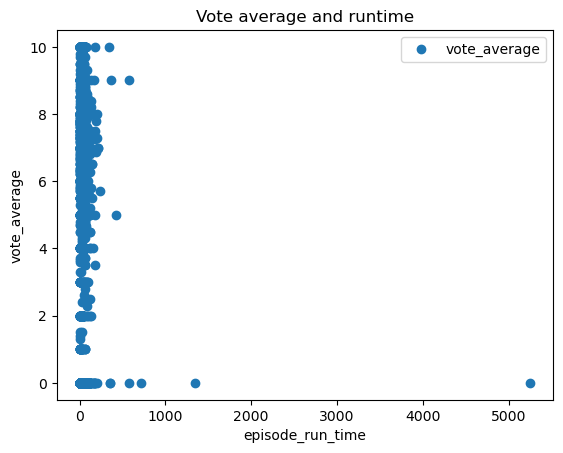

In [27]:
# Create a scatterplot comparing runtime and vote_average
# used sample because using entire dataset covered the whole field in dots

sample.plot(x = 'episode_run_time', y= 'vote_average' ,style='o') 
plt.title('Vote average and runtime')  
plt.xlabel('episode_run_time')  
plt.ylabel('vote_average')  
plt.show()

## 3. Prepare variables for regression 

In [28]:
#reshape variables for regression 
X = sample['episode_run_time'].values.reshape(-1, 1)
y = sample['vote_average'].values.reshape(-1, 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [30]:
#create linear regression object
regression = LinearRegression()

In [31]:
#fit regression to training set
regression.fit(X_train, y_train)

LinearRegression()

In [32]:
y_predicted = regression.predict(X_test)

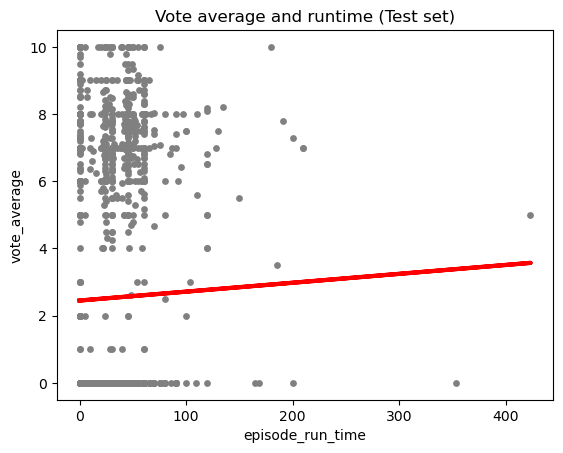

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Vote average and runtime (Test set)')
plot_test.xlabel('episode_run_time')
plot_test.ylabel('vote_average')
plot_test.show()

### Hypothesis: Films that are shorter than 100 minutes have a higher vote average.

In [34]:
# Create objects for model mean squared error and R2 score

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [35]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00265042]]
Mean squared error:  13.12971357493364
R2 score:  0.008061201651901828


In [36]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.000,2.447440
1,6.000,2.526953
2,0.000,2.447440
3,9.000,2.564059
4,8.700,2.606465
5,0.000,2.513701
6,7.800,2.447440
7,0.000,2.447440
8,0.000,2.447440
9,0.000,2.447440


### predicted values are very far off of actual values in many cases. This model is not good at predicting trip time based on the checkout time of day

## Create a subset for the runtime 0-100 minutes to see if it can create a better fitting model

In [37]:
#create subset with the runtime 0-100 minutes
subset = movie_dataset[(movie_dataset['episode_run_time'] >= 0.00) & (movie_dataset['episode_run_time'] <= 100.00)]
subset.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Álex Pina,es,"Netflix, Antena 3",ES,Español,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


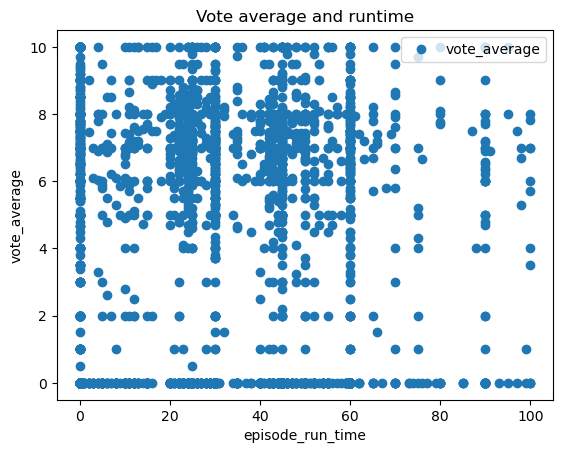

In [38]:
# Create a scatterplot comparing checkout time and trip time
sub_sample = subset.sample(n=5000)

sub_sample.plot(x = 'episode_run_time', y= 'vote_average' ,style='o') 
plt.title('Vote average and runtime')  
plt.xlabel('episode_run_time')  
plt.ylabel('vote_average')  
plt.show()

In [53]:
#reshape variables for regression 
Xs = sub_sample['episode_run_time'].values.reshape(-1, 1)
ys = sub_sample['vote_average'].values.reshape(-1, 1)

In [54]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, test_size = 0.3, random_state = 0)

In [55]:
#create linear regression object
sub_regression = LinearRegression()

In [56]:
#fit regression to training set
sub_regression.fit(Xs_train, ys_train)

LinearRegression()

In [57]:
ys_predicted = sub_regression.predict(Xs_test)

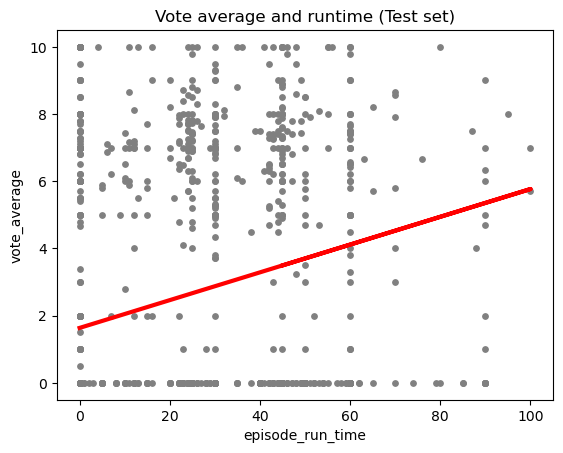

In [58]:
sub_plot_test = plt
plot_test.scatter(Xs_test, ys_test, color='gray', s = 15)
plot_test.plot(Xs_test, ys_predicted, color='red', linewidth =3)
plot_test.title('Vote average and runtime (Test set)')
plot_test.xlabel('episode_run_time')
plot_test.ylabel('vote_average')
plot_test.show()

In [59]:
# Create objects for model mean squared error and R2 score

sub_rmse = mean_squared_error(ys_test, ys_predicted)
sub_r2 = r2_score(ys_test, ys_predicted)

In [60]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', sub_rmse)
print('R2 score: ', sub_r2)

Slope: [[0.04133523]]
Mean squared error:  10.804904858685562
R2 score:  0.05391100137504845


### the MSE and R2 are larger in this instance but still indicate a poorly fitting model

In [61]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.000,1.632905
1,0.000,2.872962
2,0.000,1.632905
3,0.000,1.632905
4,0.000,1.632905
5,0.000,2.872962
6,5.250,2.872962
7,0.000,1.632905
8,1.000,1.632905
9,0.000,1.632905


### the predicted values compared to actual values support the poor fit of the model

In [64]:
#export file
movie_dataset.to_pickle(os.path.join(path,'movie_dataset.pkl'))